In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
large = 30
med = 20
small = 15
params = {"axes.titlesize": med,
"axes.titlepad": med,
"legend.fontsize": med, 
"axes.labelsize": med,
"axes.titlesize": med,
"xtick.labelsize": med,
"ytick.labelsize":med,
"figure.titlesize": med}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.serif"] = ["Helvetica Neue"]
plt.rcParams.update(params)

In [2]:
from trace_norm_cost_function_VQA import VQA

with open("vacuum_active_second_q.pickle", "rb") as f:
    fermionic_hamiltonian = pickle.load(f)
vqa = VQA(fermionic_hamiltonian, 1.e-3, True)

Number of terms in original qubit Hamiltonian: 53
Number of terms in truncated qubit Hamiltonian: 25
The identity term has been removed from the qubit Hamiltonian.


# Trotterization

In [ ]:
# # Expectation value of number operator.
# gamma_in = 1.0
# gamma_out = 1.0
# dt = 0.8
# number_of_data_points = 5

# charge_current_vs_t_mean, charge_current_vs_t_std, circuit_lst = vqa.charge_current_vs_time(
#      gamma_in = gamma_in,
#      gamma_out = gamma_out,
#      dt = dt,
#      number_of_data_points = number_of_data_points,
#      simulation_type = {"Noisy": True, "T_1": 500e3, "T_2": 450e3}
# )

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 6))
# plt.plot(np.arange(dt, (number_of_data_points)*dt - 1, dt), charge_current_vs_t_mean, marker='o', label='Charge Current', color = "grey", lw = 3, markersize = 10)
# plt.fill_between(np.arange(dt, (number_of_data_points)*dt - 1, dt), charge_current_vs_t_mean - charge_current_vs_t_std, charge_current_vs_t_mean + charge_current_vs_t_std, color='lightgrey', alpha=0.5)
# plt.xlabel("Time")
# plt.ylabel("Charge current")
# plt.legend()
# plt.tight_layout()
# for spine in ax.spines.values():
#      spine.set_linewidth(2)
# ax.tick_params(width=2, length=10, direction='in', which='major', color = "k")
# plt.show()

In [ ]:
# gamma_in = 1.0
# gamma_out = 1.0
# dt = 0.8
# number_of_data_points = 10

# rho_t_system = vqa.time_evolved_of_density_matrix(
#      gamma_in = gamma_in,
#      gamma_out = gamma_out,
#      dt = dt,
#      number_of_data_points = number_of_data_points,
#      simulation_type = {"Noisy": True, "T_1": 500e3, "T_2": 450e3}
# )

# VQA

In [20]:
gamma_in = 1.0
gamma_out = 1.0

last_layer_angles, last_layer_angles_history, last_layer_cost_history = vqa.optimize_last_layer(
     gamma_in = gamma_in,
     gamma_out = gamma_out,
     angles = [[0.5, 0.1, 0.7]],
     learning_rate = 1.0,
     num_iterations = 50,
     simulation_type = {"Noisy": True, "T_1": 305e3, "T_2": 350e3}
)

Variational circuit depth is 1340.
Iteration 1/50
Calculating gradients.
Variational circuit depth is 1336.
Variational circuit depth is 1337.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1337.
Cost : 0.9592636010603097
Iteration 2/50
Calculating gradients.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Cost : 0.8944750488547456
Iteration 3/50
Calculating gradients.
Variational circuit depth is 1336.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1336.
Cost : 0.8141903415972462
Iteration 4/50
Calculating gradients.


KeyboardInterrupt: 

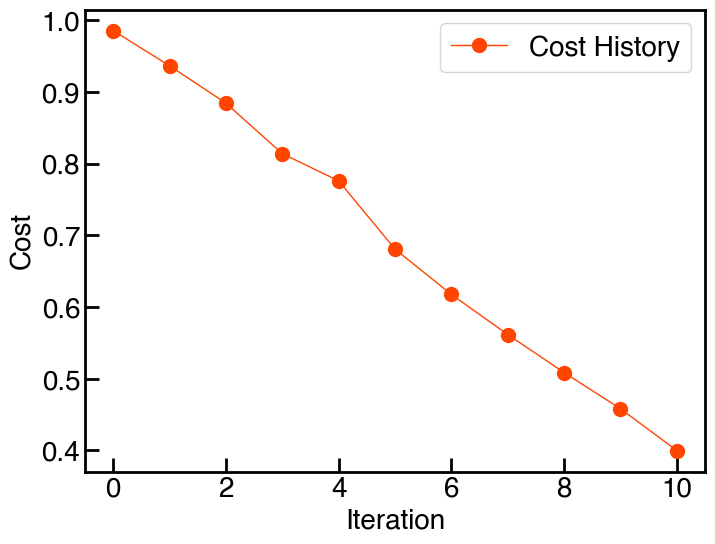

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(range(len(last_layer_cost_history)),  last_layer_cost_history, marker='o', label='Cost History', color = "orangered", lw = 1, markersize = 10)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=2, length=10, direction='in', which='major', color = "k")
plt.show()

In [15]:
gamma_in = 0.5
gamma_out = 0.5
best_angles, angles_history, cost_history = vqa.optimize(gamma_in, gamma_out, initial_angles = [[0.5, 0.1, 1.0]], learning_rate = 1.0, num_iterations = 10,  simulation_type = {"Noisy": True, "T_1": 305e3, "T_2": 350e3})

Running a depth 1 ansatz circuit.
Variational circuit depth is 1340.
Iteration 1/10
Calculating gradients.
Variational circuit depth is 1336.
Variational circuit depth is 1337.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Cost : 0.4270776413717774
Iteration 2/10
Calculating gradients.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1340.
Variational circuit depth is 1337.
Cost : 0.4107954304757419
Iteration 3/10
Calculating gradients.
Variational circuit depth is 1336.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1337.
Variational circuit depth is 1341.
Cost : 0.3632561906994075
Iter

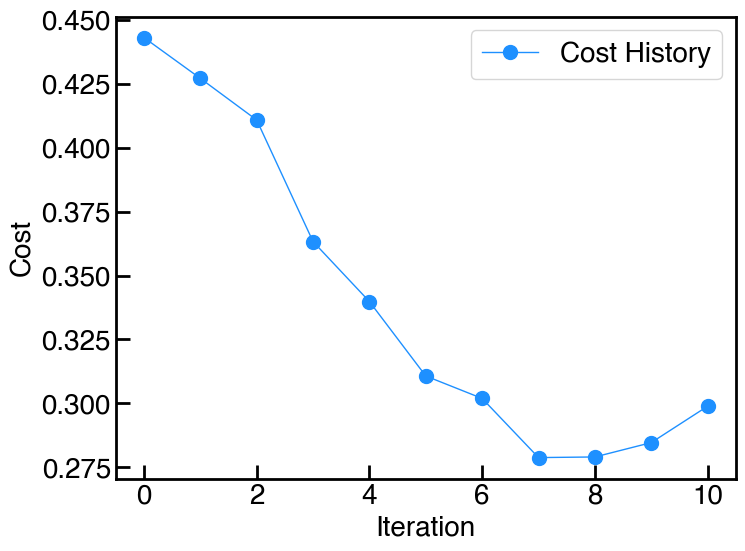

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(range(len(cost_history)), cost_history, marker='o', label='Cost History', color = "dodgerblue", lw = 1, markersize = 10)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=2, length=10, direction='in', which='major', color = "k")
plt.show()

# Cluster data analysis and plot

In [8]:
path = "/Users/sasankadowarah/Ultimate_QM_MM/VQA/VQA_OPESme/cluster_data/OPESme_trace_norm_v2"
os.chdir(path)

os.chdir(path +  f"/b0")
energy_history_1 = np.load(f"vacuum_cost_history_1_layers.npy")
os.chdir(path +  f"/b1")
energy_history_2 = np.load(f"vacuum_cost_history_2_layers.npy")
os.chdir(path +  f"/b2")
energy_history_3 = np.load(f"vacuum_cost_history_3_layers.npy")
os.chdir(path +  f"/b3")
energy_history_7 = np.load(f"vacuum_cost_history_4_layers.npy")
os.chdir(path +  f"/b4")
energy_history_8 = np.load(f"vacuum_cost_history_5_layers.npy")

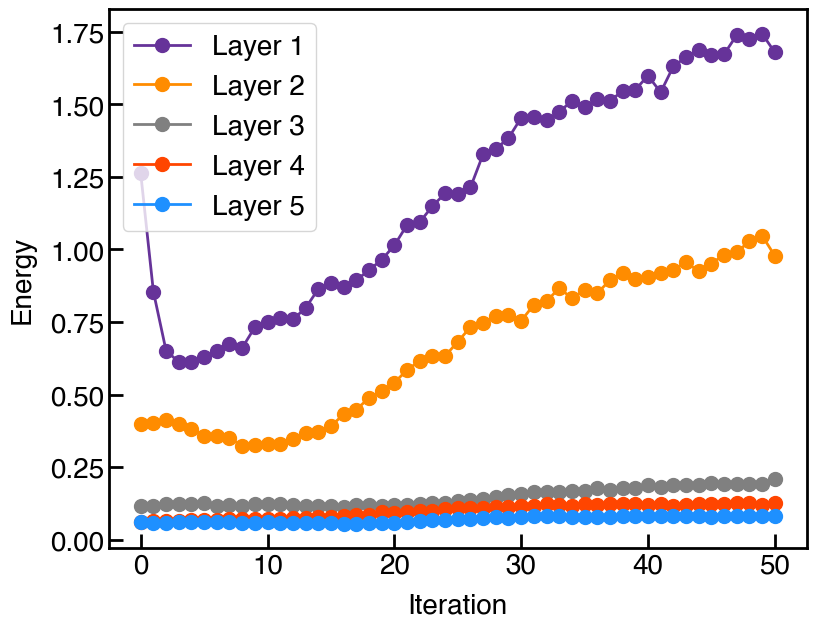

In [10]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(range(len(energy_history_1)), energy_history_1, marker = 'o', markersize = 10, lw = 2, label = 'Layer 1', color = 'rebeccapurple')
plt.plot(range(len(energy_history_2)), energy_history_2, marker = 'o', markersize = 10, lw = 2, label = 'Layer 2', color = 'darkorange')
plt.plot(range(len(energy_history_3)), energy_history_3, marker = 'o', markersize = 10, lw = 2, label = 'Layer 3', color = 'grey')
plt.plot(range(len(energy_history_7)), energy_history_7, marker = 'o', markersize = 10, lw = 2, label = 'Layer 4', color = 'orangered')
plt.plot(range(len(energy_history_8)), energy_history_8, marker = 'o', markersize = 10, lw = 2, label = 'Layer 5', color = 'dodgerblue')
plt.legend()
plt.xlabel(r'Iteration', labelpad = 10)
plt.ylabel(r'Energy', labelpad = 10)
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=2, length=10, direction='in', which='major', color = "k")
# plt.axhline(y = -45)
# path = "/Users/sasankadowarah/Ultimate_QM_MM/VQA/VQA_OPESme/cluster_data"
# os.chdir(path)
# plt.savefig("vacuum_OPESme_1_2_3_7_8_energy_convergence.png", dpi = 600, bbox_inches = 'tight')
plt.show()